In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv('cardio_vascular.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# rename columns
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [5]:
df.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# model building process---classification--binary class

In [7]:
X=df.drop(['heart_disease'],axis=1)
Y=df['heart_disease']

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scale=MinMaxScaler()


In [10]:
X_scaled=scale.fit_transform(X)

In [11]:
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667


In [12]:
# lets train the model

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [15]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

In [16]:
X_train.shape

(820, 13)

In [17]:
Y_train.shape

(820,)

In [18]:
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb=GaussianNB()

In [19]:
mnb.fit(X_train,Y_train)

MultinomialNB()

In [20]:
bnb.fit(X_train,Y_train)

BernoulliNB()

In [21]:
gnb.fit(X_train,Y_train)

GaussianNB()

In [22]:
Y_test_predict=mnb.predict(X_test)

In [24]:
Y_test_predict_b=bnb.predict(X_test)

In [25]:
Y_test_predict_g=gnb.predict(X_test)

In [26]:
# check the model performance

In [27]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [28]:
accuracy_score(Y_test,Y_test_predict)# MultinomialNB

0.8390243902439024

In [29]:
accuracy_score(Y_test,Y_test_predict_b)# BernoulliNB

0.8390243902439024

In [30]:
accuracy_score(Y_test,Y_test_predict_g)# GaussianNB

0.8292682926829268

In [36]:
cm=confusion_matrix(Y_test,Y_test_predict)
cm

array([[71, 29],
       [ 8, 97]])

In [32]:
cm_b=confusion_matrix(Y_test,Y_test_predict_b)
cm_b

array([[82, 18],
       [15, 90]])

In [34]:
cm_g=confusion_matrix(Y_test,Y_test_predict_g)
cm_g

array([[76, 24],
       [11, 94]])

In [35]:
print(classification_report(Y_test,Y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       100
           1       0.83      0.86      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [36]:
print(classification_report(Y_test,Y_test_predict_b))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       100
           1       0.83      0.86      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [38]:
print(classification_report(Y_test,Y_test_predict_g))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       100
           1       0.80      0.90      0.84       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



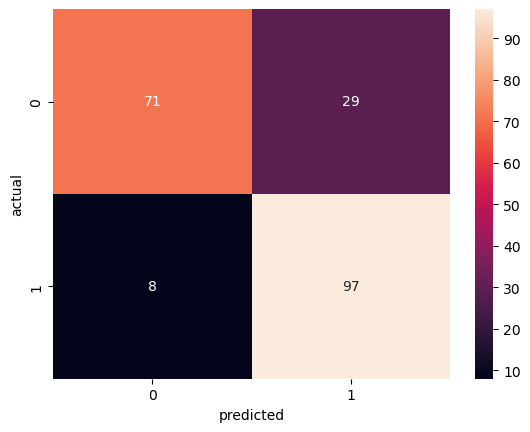

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [43]:
#TN,FP,FN,TP
TN,FP,FN,TP=cm.ravel()
print('true negative',TN)
print('false positive',FP)
print('false negative',FN)
print('true positive',TP)

true negative 71
false positive 29
false negative 8
true positive 97


In [50]:
# specifity (True negative rate)
specifity=TN/(TN+FP)
# this for majority class value
specifity

0.71

In [51]:
sensitivity=TP/(TP+FN)
#minority class value recal
sensitivity

0.9238095238095239

# ROC AUC

In [40]:
from sklearn.metrics import roc_auc_score,roc_curve

In [41]:
auc_score=roc_auc_score(Y_test,Y_test_predict)
auc_score

0.8385714285714287

In [75]:
probability_score=mnb.predict_proba(X_test)
probability_score

array([[0.38090948, 0.61909052],
       [0.71485142, 0.28514858],
       [0.88024168, 0.11975832],
       [0.15507631, 0.84492369],
       [0.55255837, 0.44744163],
       [0.77699577, 0.22300423],
       [0.40889574, 0.59110426],
       [0.32005953, 0.67994047],
       [0.27436489, 0.72563511],
       [0.46121725, 0.53878275],
       [0.38897106, 0.61102894],
       [0.81921315, 0.18078685],
       [0.32005953, 0.67994047],
       [0.88024168, 0.11975832],
       [0.41419835, 0.58580165],
       [0.49558644, 0.50441356],
       [0.29142125, 0.70857875],
       [0.78064101, 0.21935899],
       [0.25897652, 0.74102348],
       [0.3989668 , 0.6010332 ],
       [0.32036753, 0.67963247],
       [0.44441594, 0.55558406],
       [0.26808722, 0.73191278],
       [0.40889574, 0.59110426],
       [0.18393372, 0.81606628],
       [0.28889639, 0.71110361],
       [0.39372087, 0.60627913],
       [0.31026833, 0.68973167],
       [0.20154791, 0.79845209],
       [0.90234241, 0.09765759],
       [0.

In [76]:
Y_test

472     1
29      0
122     0
173     1
36      1
       ..
711     0
669     0
1021    0
805     1
689     1
Name: heart_disease, Length: 205, dtype: int64

In [78]:
Y_test_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1])

In [82]:
pos_probability=mnb.predict_proba(X_test)[:,1]
pos_probability

array([0.61909052, 0.28514858, 0.11975832, 0.84492369, 0.44744163,
       0.22300423, 0.59110426, 0.67994047, 0.72563511, 0.53878275,
       0.61102894, 0.18078685, 0.67994047, 0.11975832, 0.58580165,
       0.50441356, 0.70857875, 0.21935899, 0.74102348, 0.6010332 ,
       0.67963247, 0.55558406, 0.73191278, 0.59110426, 0.81606628,
       0.71110361, 0.60627913, 0.68973167, 0.79845209, 0.09765759,
       0.28024477, 0.35467674, 0.58580165, 0.79680276, 0.38377002,
       0.132752  , 0.3125543 , 0.79712922, 0.64351091, 0.65270332,
       0.19407804, 0.32091905, 0.57296429, 0.72413178, 0.17064204,
       0.43724976, 0.59048289, 0.26019922, 0.75024887, 0.12193916,
       0.64615966, 0.77078525, 0.76378994, 0.7930437 , 0.72594578,
       0.71333869, 0.7435335 , 0.60642041, 0.67994379, 0.7211779 ,
       0.70232627, 0.80870166, 0.19407804, 0.59888198, 0.29592801,
       0.71440899, 0.7174681 , 0.18798541, 0.18534321, 0.80479828,
       0.18952841, 0.15537041, 0.59888198, 0.79296   , 0.72939

In [46]:
pos_probability_bnb=bnb.predict_proba(X_test)[:,1]


In [47]:
pos_probability_gnb=gnb.predict_proba(X_test)[:,1]


In [83]:
# lets calculate True Negative Rate(TPR), False Positive Rate(FPR)

In [85]:
FPR,TPR,Threshold=roc_curve(Y_test,pos_probability,pos_label=1)

In [86]:
print('FPR',FPR)
print('TPR',TPR)

FPR [0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.03 0.03 0.04 0.04 0.05
 0.05 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 0.07 0.07 0.09 0.09 0.09
 0.1  0.1  0.12 0.12 0.12 0.14 0.14 0.14 0.14 0.16 0.16 0.16 0.17 0.17
 0.17 0.17 0.21 0.21 0.23 0.23 0.23 0.25 0.27 0.27 0.29 0.29 0.33 0.33
 0.34 0.34 0.36 0.36 0.37 0.37 0.38 0.4  0.46 0.48 0.5  0.52 0.52 0.53
 0.55 0.6  0.6  0.62 0.66 0.68 0.7  0.71 0.73 0.74 0.76 0.78 0.82 0.83
 0.85 0.87 0.9  0.91 0.95 0.98 1.  ]
TPR [0.         0.01904762 0.03809524 0.04761905 0.06666667 0.07619048
 0.0952381  0.0952381  0.17142857 0.17142857 0.2        0.2
 0.25714286 0.25714286 0.35238095 0.39047619 0.43809524 0.47619048
 0.4952381  0.4952381  0.51428571 0.53333333 0.54285714 0.54285714
 0.56190476 0.56190476 0.59047619 0.60952381 0.60952381 0.61904762
 0.61904762 0.63809524 0.65714286 0.65714286 0.6952381  0.71428571
 0.73333333 0.73333333 0.75238095 0.76190476 0.76190476 0.78095238
 0.81904762 0.82857143 0.82857143 0.85714286 0.85714286 0.87619048


Text(0, 0.5, 'true positive rate')

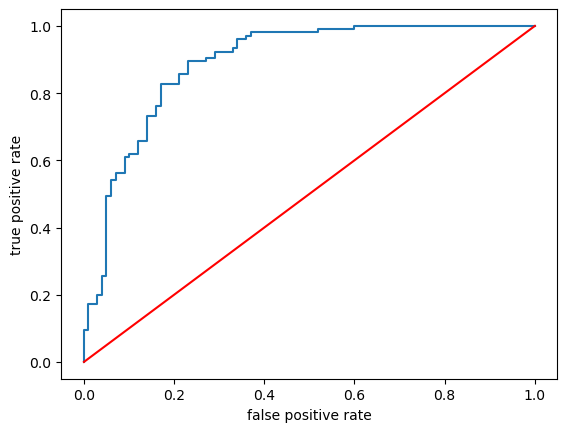

In [88]:
plt.plot(FPR,TPR)
plt.plot([0,1],color='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [50]:
FPR,TPR,Threshold=roc_curve(Y_test,pos_probability_bnb,pos_label=1)

Text(0, 0.5, 'true positive rate')

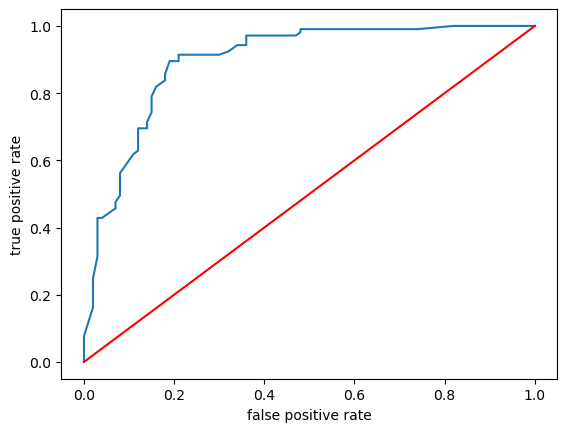

In [51]:
plt.plot(FPR,TPR)
plt.plot([0,1],color='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

In [53]:
FPR,TPR,Threshold=roc_curve(Y_test,pos_probability_gnb,pos_label=1)

Text(0, 0.5, 'true positive rate')

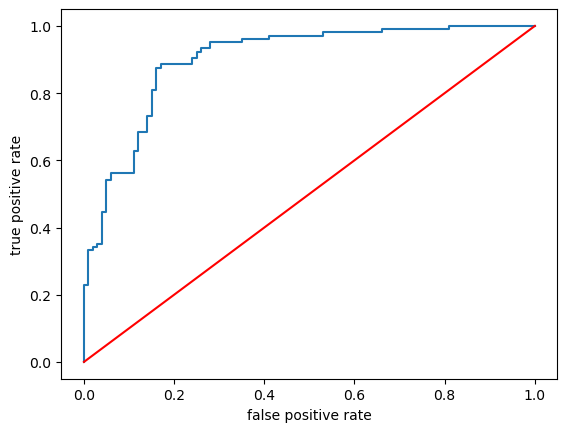

In [54]:
plt.plot(FPR,TPR)
plt.plot([0,1],color='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')